In [1]:
# MAIN QUESTION: Does number of promotions sent impact "generosity"?
# To answer this question, we will answer four sub questions:
# QUESTION 1: Does number of promotions sent impact the total amount of donations?
# QUESTION 2: Does number of promotions sent impact the average amount of donations?
# QUESTION 3: Does number of promotions sent impact the time since the last donation?
# QUESTION 4: Does number of promotions sent impact the frequency of donations?
# -- 
# QUESTION 5: Does number of promotions sent impact the percent of donations?
# NOTE: "Headings" and analysis are preceeded by a single octothorp
## Code comments & processing steps are preceeded by two octothorpes 

In [26]:
## STEP 1: Import libraries
## We are using pandas for our data frames and matplot lib for our graphs.
## Gridspec is used to arrange our graphs

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
donors = pd.read_csv('donors_data.csv')

In [4]:
## STEP 2: Examine and clean data
donors.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [5]:
donors.describe()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,...,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,1560.500000,11615.770833,0.214423,0.185256,0.214423,0.384615,0.770192,1.069231,3.893910,0.609295,...,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,900.810746,6698.678131,0.410487,0.388568,0.410487,0.486582,0.420777,0.347688,1.636186,0.487987,...,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,780.750000,5820.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,...,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,1560.500000,11735.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,...,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,2340.250000,17435.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,3120.000000,23293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,...,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


In [23]:
## "Remove rows" we do not need by creating a new data frame with only the data we want
## Used this opportunity to rename these haphazard variable names
## Added a '_d' to variables that arrived already discretized 

In [24]:
donors_cleaned = pd.concat([donors['homeowner dummy'], 
                  donors['NUMCHLD'],
                  donors['INCOME'], 
                  donors['gender dummy'],
                  donors['WEALTH'],
                  donors['HV'],
                  donors['Icmed'],
                  donors['Icavg'],
                  donors['IC15'],
                  donors['NUMPROM'], 
                  donors['RAMNTALL'], 
                  donors['MAXRAMNT'], 
                  donors['LASTGIFT'], 
                  donors['totalmonths'], 
                  donors['TIMELAG'], 
                  donors['AVGGIFT']
                 ], 
                 axis=1, 
                 keys=['homeowner', 
                       'numchildren',
                       'income_d',
                       'gender',
                       'wealth_d', 
                       'homevalue',
                       'income_med', 
                       'income_avg',
                       'lowincome_perc',
                       'numpromos', 
                       'donations_total', 
                       'donations_max', 
                       'donations_last', 
                       'donations_months_since_last', 
                       'donations_months_between_first_second', 
                       'donations_avg'])

In [27]:
donors_cleaned.describe()

,homeowner,numchildren,income_d,gender,wealth_d,homevalue,income_med,income_avg,lowincome_perc,numpromos,donations_total,donations_max,donations_last,donations_months_since_last,donations_months_between_first_second,donations_avg
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,0.770192,1.069231,3.893910,0.609295,6.402244,1141.361859,388.217308,432.088141,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713
std,0.420777,0.347688,1.636186,0.487987,2.539978,946.642162,172.815950,168.195104,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889
25%,1.000000,1.000000,3.000000,0.000000,5.000000,556.000000,278.000000,318.000000,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092
50%,1.000000,1.000000,4.000000,1.000000,8.000000,822.000000,356.000000,396.000000,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000
75%,1.000000,1.000000,5.000000,1.000000,8.000000,1338.750000,465.000000,516.000000,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652
max,1.000000,5.000000,7.000000,1.000000,9.000000,5945.000000,1500.000000,1331.000000,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667


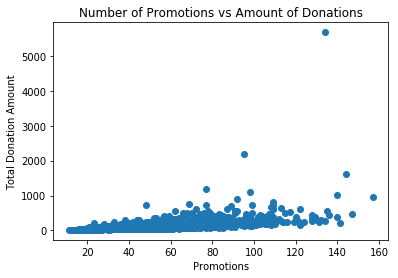

In [29]:
# QUESTION 1: Does number of promotions sent impact the total amount of donations?
# To answer this question, we need:
# 1 -- the total number of promotions
# 2 -- the total amount of donations
plt.plot(donors_cleaned.numpromos, donors_cleaned.donations_total, 'o')
plt.title('Number of Promotions vs Amount of Donations')
plt.xlabel('Promotions')
plt.ylabel('Total Donation Amount')
plt.show()

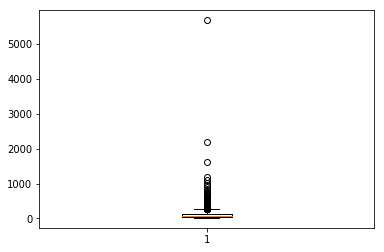

In [31]:
# That looks like a pretty big outlier 
# We should take note of this outlier and then remove it so it doesn't skew the rest of the analysis
plt.boxplot(donors_cleaned.donations_total)
plt.show()

In [32]:
# Testing before I make a big change
test = donors_cleaned

In [43]:
# Only adding items to the df if the donations total is < 250
test = donors_cleaned[donors_cleaned.donations_total < 2500]

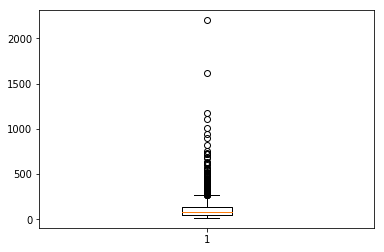

In [45]:
# Re-examining our boxplot
plt.boxplot(test.donations_total)
plt.show()

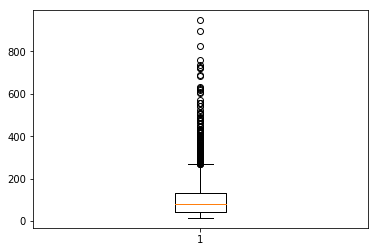

In [47]:
# Still some big outliers
# Settled on 1000 as that is a nice clean "donation-esque" number
test = donors_cleaned[donors_cleaned.donations_total <= 1000]
plt.boxplot(test.donations_total)
plt.show()

In [48]:
# Confirming we still have a good dataset
test.count()

homeowner                                3114
numchildren                              3114
income_d                                 3114
gender                                   3114
wealth_d                                 3114
homevalue                                3114
income_med                               3114
income_avg                               3114
lowincome_perc                           3114
numpromos                                3114
donations_total                          3114
donations_max                            3114
donations_last                           3114
donations_months_since_last              3114
donations_months_between_first_second    3114
donations_avg                            3114
dtype: int64

In [49]:
# Reassigning our variable
donors_cleaned = test

In [50]:
# Verifying it worked
donors_cleaned.count()

homeowner                                3114
numchildren                              3114
income_d                                 3114
gender                                   3114
wealth_d                                 3114
homevalue                                3114
income_med                               3114
income_avg                               3114
lowincome_perc                           3114
numpromos                                3114
donations_total                          3114
donations_max                            3114
donations_last                           3114
donations_months_since_last              3114
donations_months_between_first_second    3114
donations_avg                            3114
dtype: int64

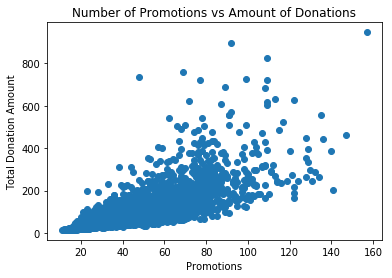

In [51]:
# BACK TO OUR ORIGINALLY SCHEDULED PROGRAMMING!!
# QUESTION 1: Does number of promotions sent impact the total amount of donations?
# To answer this question, we need:
# 1 -- the total number of promotions
# 2 -- the total amount of donations
plt.plot(donors_cleaned.numpromos, donors_cleaned.donations_total, 'o')
plt.title('Number of Promotions vs Amount of Donations')
plt.xlabel('Promotions')
plt.ylabel('Total Donation Amount')
plt.show()

In [52]:
# This is so much more useful!!
# Moving on
# I'm sure there is a better way to do this...

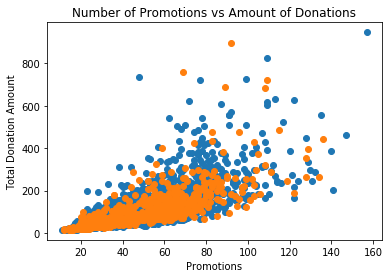

In [54]:
# SIDE QUEST QUESTION: 
homeowner_yes = donors_cleaned[donors_cleaned.homeowner == 1]
homeowner_no = donors_cleaned[donors_cleaned.homeowner == 0]
plt.plot(homeowner_yes.numpromos, homeowner_yes.donations_total, 'o')
plt.plot(homeowner_no.numpromos, homeowner_no.donations_total, 'o')
plt.title('Number of Promotions vs Amount of Donations')
plt.xlabel('Promotions')
plt.ylabel('Total Donation Amount')
plt.show()

In [55]:
# QUESTION 2: Does number of promotions sent impact the average amount of donations?
# To answer this question, we need:
# 1 -- the total number of promotions
# 2 -- the average amount of donations

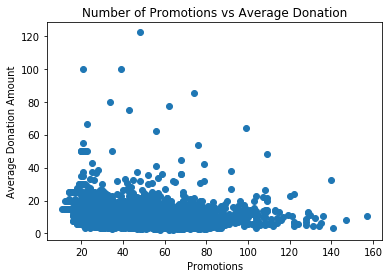

In [56]:
plt.plot(donors_cleaned.numpromos, donors_cleaned.donations_avg, 'o')
plt.title('Number of Promotions vs Average Donation')
plt.xlabel('Promotions')
plt.ylabel('Average Donation Amount')
plt.show()

In [57]:
# QUESTION 3: Does number of promotions sent impact the time since the last donation?
# To answer this question, we need:
# 1 -- the total number of promotions
# 2 -- the time since the last donation

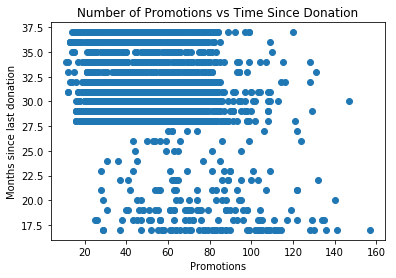

In [58]:
plt.plot(donors_cleaned.numpromos, donors_cleaned.donations_months_since_last, 'o')
plt.title('Number of Promotions vs Time Since Donation')
plt.xlabel('Promotions')
plt.ylabel('Months since last donation')
plt.show()

In [ ]:
# QUESTION 3.5: Does number of promotions sent impact the time between first and second donation?
# To answer this question, we need:
# 1 -- the total number of promotions
# 2 -- the between first and second

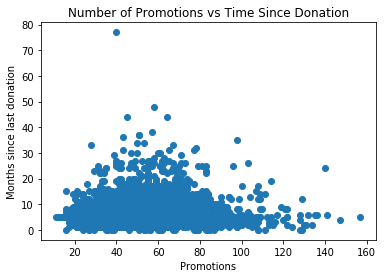

In [59]:
plt.plot(donors_cleaned.numpromos, donors_cleaned.donations_months_between_first_second, 'o')
plt.title('Number of Promotions vs Time Since Donation')
plt.xlabel('Promotions')
plt.ylabel('Months since last donation')
plt.show()

In [60]:
# QUESTION 4: Does number of promotions sent impact the frequency of donations?
# To answer this question, we need:
# 1 -- the total number of promotions
# 2 -- the frequency of donations
# - to get the frequency of donations, we need:
# -- 2a. The total donations
# -- 2b. The average donations 

In [63]:
donation_frequency = donors_cleaned.donations_total/donors_cleaned.donations_avg

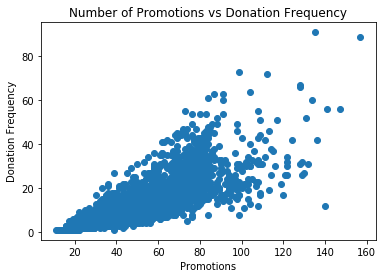

In [64]:
plt.plot(donors_cleaned.numpromos, donation_frequency, 'o')
plt.title('Number of Promotions vs Donation Frequency')
plt.xlabel('Promotions')
plt.ylabel('Donation Frequency')
plt.show()